Importando Bibliotecas

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

Carregar Base de Dados

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

Visualizar Primeiras Linhas dos Dados

In [3]:
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Selecionar Colunas Relevantes Para o Modelo

In [16]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
target = 'Survived'
train_data = train_data[features + [target]].dropna()

Transformar Variaveis Catagoricas em Numericas

In [17]:
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
train_data['Sex'] = le_sex.fit_transform(train_data['Sex'])  # 'male' -> 1, 'female' -> 0
train_data['Embarked'] = le_embarked.fit_transform(train_data['Embarked'])  # 'S', 'C', 'Q' -> 0, 1, 2

Dividir em dados de treino e teste

In [18]:
X = train_data[features]
y = train_data[target]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Criar arvores com os criterios de Entropy e Gini

In [20]:
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

Treinar Modelos

In [22]:
tree_entropy.fit(X_train, y_train)
tree_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Fazer Previsões


In [23]:
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_gini = tree_gini.predict(X_test)


Avaliar Acurácia


In [25]:
acc_entropy = accuracy_score(y_test, y_pred_entropy)
acc_gini = accuracy_score(y_test, y_pred_gini)
print(f"\nAcurácia (Entropia): {acc_entropy:.4f}")
print(f"Acurácia (Gini): {acc_gini:.4f}")


Acurácia (Entropia): 0.7483
Acurácia (Gini): 0.7343


Estrutura

In [27]:
print("\nÁrvore de Decisão (Entropia):")
print(export_text(tree_entropy, feature_names=list(X.columns)))
print("\nÁrvore de Decisão (Gini):")
print(export_text(tree_gini, feature_names=list(X.columns)))


Árvore de Decisão (Entropia):
|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- Fare <= 88.78
|   |   |   |   |--- class: 1
|   |   |   |--- Fare >  88.78
|   |   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- Age <= 24.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  24.50
|   |   |   |   |--- Age <= 27.50
|   |   |   |   |   |--- Fare <= 17.43
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Fare >  17.43
|   |   |   |   |   |   |--- Fare <= 28.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Fare >  28.00
|   |   |   |   |   |   |   |--- Fare <= 115.20
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Fare >  115.20
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  27.50
|   |   |   |   |   |--- Fare <= 30.61
|   |   |   |   |   |   |--- Age <= 37.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  37.00
|

Plotar

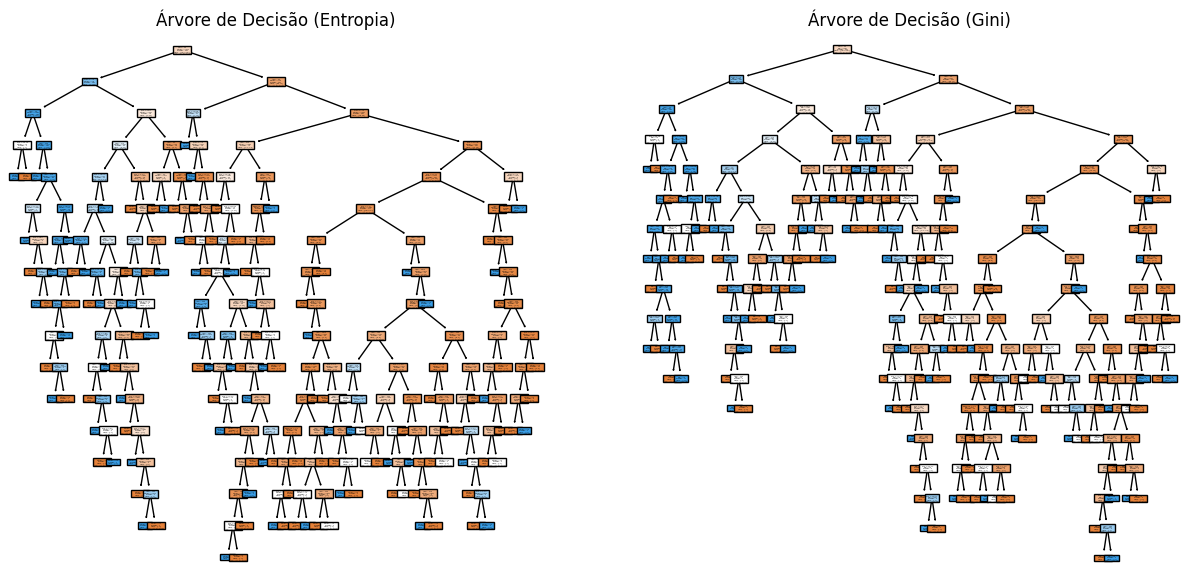

In [28]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plot_tree(tree_entropy, feature_names=X.columns, class_names=["Não Sobreviveu", "Sobreviveu"], filled=True)
plt.title("Árvore de Decisão (Entropia)")

plt.subplot(1, 2, 2)
plot_tree(tree_gini, feature_names=X.columns, class_names=["Não Sobreviveu", "Sobreviveu"], filled=True)
plt.title("Árvore de Decisão (Gini)")

plt.show()

Plotar Gini

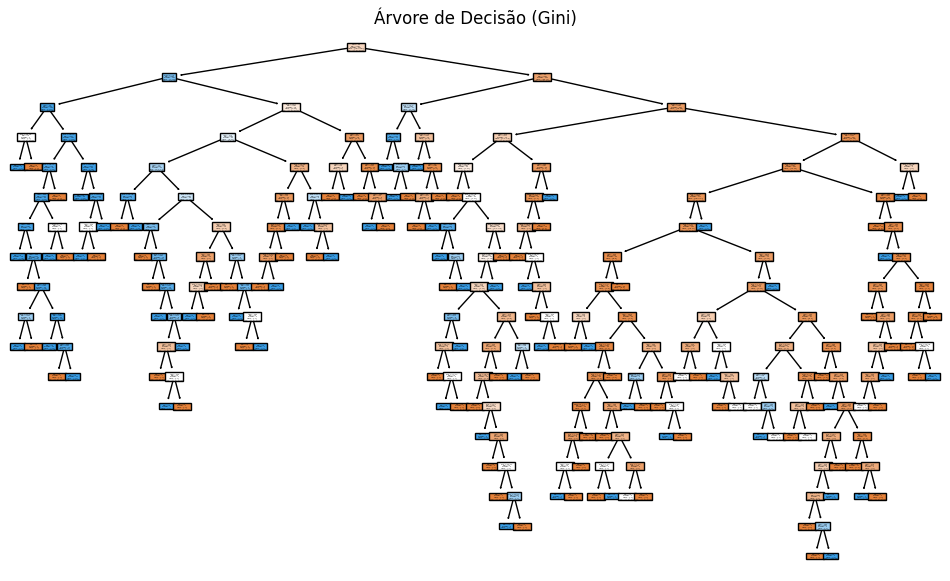

In [29]:
plt.figure(figsize=(12, 7))
plot_tree(tree_gini, feature_names=X.columns, class_names=["Não Sobreviveu", "Sobreviveu"], filled=True)
plt.title("Árvore de Decisão (Gini)")
plt.show()

Plotar Entropia

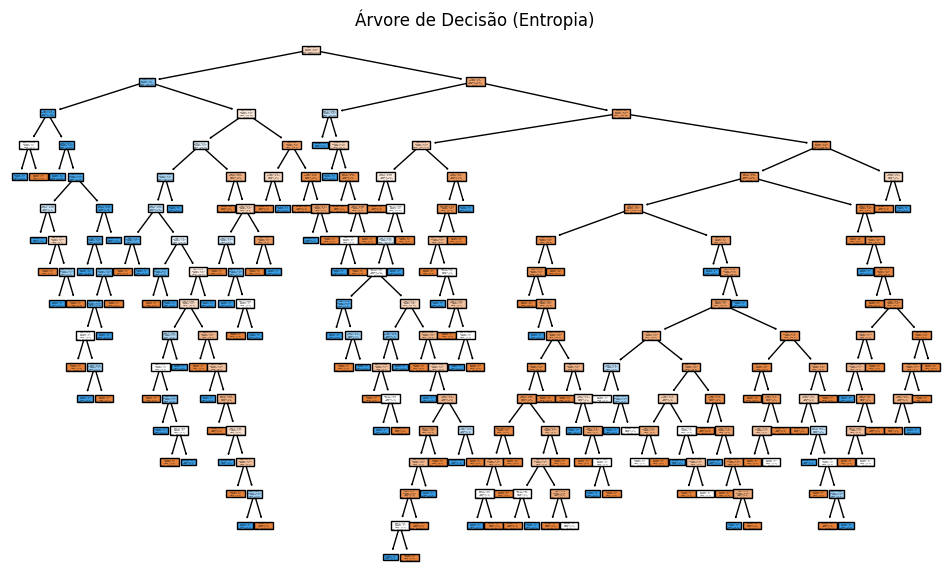

In [30]:
plt.figure(figsize=(12, 7))
plot_tree(tree_entropy, feature_names=X.columns, class_names=["Não Sobreviveu", "Sobreviveu"], filled=True)
plt.title("Árvore de Decisão (Entropia)")
plt.show()